<a href="https://colab.research.google.com/github/WYSTANich/PDA_sol-/blob/main/hw_3_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import pandas as pd
pd.__version__

'1.5.3'

Если вы увидели warning, не переживайте, всё хорошо.
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [2]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
# df = pd.read_csv('../../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1) Выведите последние 10 элеметнов датасета

In [3]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


2) Сколько колонок и сколько строк в этом датасете?

In [6]:
r, c = df.shape
print("rows = {0}, columns = {1}".format(r,c))

rows = 32561, columns = 15


3) Какие типы данных у элементов этого датасета?

In [7]:
df.info(verbose = True, null_counts = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   age             int64 
 1   workclass       object
 2   fnlwgt          int64 
 3   education       object
 4   education.num   int64 
 5   marital.status  object
 6   occupation      object
 7   relationship    object
 8   race            object
 9   sex             object
 10  capital.gain    int64 
 11  capital.loss    int64 
 12  hours.per.week  int64 
 13  native.country  object
 14  income          object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<ipython-input-7-ac718a15bc14>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose = True, null_counts = False)


4) Какие признаки имеют пропуски?

In [10]:
import numpy as np
df = df.replace(' ?',np.nan)
l = [i for i in df if df[i].isnull().any()]
print(l)

['workclass', 'occupation', 'native.country']


5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Ваш ответ: Респондент не соотнес себя с определенными заранее вариантами, пропуски относятся к категориальным значениям


6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [11]:
print(df.workclass.value_counts())
print("количество без пропусков: {}".format(df.workclass.nunique()-1))

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
количество без пропусков: 7


7) Какой средний возраст женщин и мужчин?

In [15]:
l = df[['sex', 'age']].groupby(['sex']).aggregate(sum)
print(l.groupby(['sex']).get_group(' Male').iloc[0]/df.sex.value_counts()[' Male'])

print(l.groupby(['sex']).get_group(' Female').iloc[0]/df.sex.value_counts()[' Female'])

age    39.433547
Name:  Male, dtype: float64
age    36.85823
Name:  Female, dtype: float64


8) Постройте гистограмму(bar) распределения образования людей (education)

Axes(0.125,0.11;0.775x0.77)


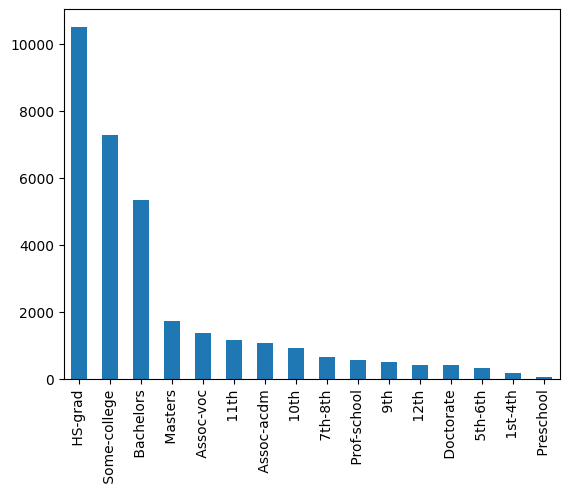

In [16]:
print(df['education'].value_counts().plot(kind='bar'))

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?

In [19]:
l = df[['income', 'age']].groupby(['income']).agg(["mean","std"])
print(l)

              age           
             mean        std
income                      
 <=50K  36.783738  14.020088
 >50K   44.249841  10.519028


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [20]:
l = df[['income', 'education']].groupby(['income']).get_group(' >50K')
rows = l.shape[0]
EduRows = l.loc[l['education'].isin([' Bachelors', ' Prof-school', ' Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate'])].shape[0]
if rows - EduRows>0:
  print("не все имеют высшее образование")
else:
  print("все имеют высшее образование")

не все имеют высшее образование


11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [21]:
l = df.groupby(['sex']).get_group(' Male').groupby(['income']).get_group(' >50K')
rows = l.shape[0]
marriedRows = l.loc[l['marital.status'].isin([' Married-civ-spouse', ' Married-spouse-absent', ' Married-AF-spouse'])].shape[0]

if rows - marriedRows<marriedRows:
  print("Среди женатых")
else:
  print("Среди неженатых")

Среди женатых


12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).

In [23]:
time = df[['native.country','hours.per.week', 'income']].groupby(['native.country','income'])['hours.per.week'].agg(["mean"])

print(time)

                            mean
native.country income           
 Cambodia       <=50K  41.416667
                >50K   40.000000
 Canada         <=50K  37.914634
                >50K   45.641026
 China          <=50K  37.381818
...                          ...
 United-States  >50K   45.505369
 Vietnam        <=50K  37.193548
                >50K   39.200000
 Yugoslavia     <=50K  41.600000
                >50K   49.500000

[80 rows x 1 columns]


13) Постройте сводную таблицу для сравнения уровня образования и разницы между capital.gain и capital.loss (то есть пассивный доход). Сделайте так, чтобы capital.gain - capital.loss создали не больше 10 разных уникальных значений. То есть, gain и loss - это числа в каком-то диапазоне. Это количественные признаки из вещественных чисел. С помощью математических функций, типа log, извлечение корня N-ой степени и округления можно перейти к категориальным признакам.

In [24]:
import numpy as np
df['difference'] =(df['capital.gain']-df['capital.loss'])
df['difference'] = df['difference'].replace(0,1)
num = df._get_numeric_data()
num[num < 0] = 1
df['difference'] =np.log2(df['difference']).apply(np.round)

print("Число уникальных значений {}".format(df.difference.nunique()))

df[['education','difference']].groupby(['education'])['difference'].mean()

Число уникальных значений 10


education
 10th            0.504823
 11th            0.532766
 12th            0.598152
 1st-4th         0.357143
 5th-6th         0.501502
 7th-8th         0.739938
 9th             0.667315
 Assoc-acdm      0.963449
 Assoc-voc       1.209841
 Bachelors       1.557983
 Doctorate       2.556901
 HS-grad         0.798686
 Masters         2.124782
 Preschool       0.529412
 Prof-school     3.786458
 Some-college    0.808257
Name: difference, dtype: float64

14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [25]:
l = df.groupby(['sex']).get_group(' Female').groupby(['income']).get_group(' >50K')
l['native.country'].value_counts().index.tolist()[0]


' United-States'

15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [27]:
def magic_salary(income):
    return np.where(income == ' <=50K', np.random.randint(0, 51), np.random.randint(51, 201))
df['magic_salary'] = magic_salary(df['income'])
result = df.groupby('education')['magic_salary'].mean()
print(result)

education
 10th             18.629153
 11th             15.936170
 12th             20.337182
 1st-4th          13.250000
 5th-6th          15.408408
 7th-8th          17.835913
 9th              16.192607
 Assoc-acdm       50.462980
 Assoc-voc        52.712735
 Bachelors        79.581699
 Doctorate       136.661017
 HS-grad          34.914008
 Masters         104.402786
 Preschool         7.000000
 Prof-school     135.515625
 Some-college     40.291044
Name: magic_salary, dtype: float64
